In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from skimage import exposure
import random
import sys

In [2]:
im1 = np.array(Image.open('band1.gif', 'r'))
im2 = np.array(Image.open('band2.gif', 'r'))
im3 = np.array(Image.open('band3.gif', 'r'))
im4 = np.array(Image.open('band4.gif', 'r'))

In [3]:
# 1. Initialize corresponding k color values for k=3 clusters
k=3
color = [[0,0,0],[255,255,255],[0,255,255]]

In [4]:
# 2. Input satellite images, imageInput (512, 512,4)

imageinput=np.array([im1,im2,im3,im4])
imageinput=imageinput.reshape(512,512,4)
print(imageinput.shape)

(512, 512, 4)


In [5]:
# 3. Initialize clusteredImage as the output image

clusteredImage = np.zeros((512,512,3)) 

In [15]:
# 4. Select k=3 random x,y co-ordinates and extract pixel values from imageInput 

coord = np.array(([300,100],[200,300],[200,400]))

b1=[]
b2=[]
b3=[]
b4=[]
for i in range(k):
    b1.append(im1[coord[i][0],coord[i][1]])
    b2.append(im2[coord[i][0],coord[i][1]])
    b3.append(im3[coord[i][0],coord[i][1]])
    b4.append(im4[coord[i][0],coord[i][1]])

    
initCentroids=np.array([b1,b2,b3,b4]).T
print(initCentroids.shape)
print()
print(initCentroids[1])

(3, 4)

[11 13 16 19]


In [16]:
# 5. Clustering

#initCentroids (3, 4)
#(512, 512, 4)

def euclidean_dist(x1,x2):
    dist = sum([(a - b) ** 2 for a, b in zip(x1, x2)])**0.5
    return dist


def clustering(k,imageinput,initCentroids):
    min_dist = sys.maxsize

    classData = np.zeros((512,512))

    for i in range(512):
        for j in range(512):
            for x in range(k):
                distance = euclidean_dist(imageinput[i,j,:],initCentroids[x])

                if(min_dist > distance):
                    min_dist = distance
                    label = x

            classData[i][j] = label
            min_dist = sys.maxsize
            
    return classData


def updateCentroids(imageinput,classData):
    s=np.zeros((1,4))
    total = 0
    updatedCentroids = np.zeros((k,4))

    for x in range (k):
        for i in range(512):
            for j in range(512):
                if classData[i][j]==x:
                    s+= imageinput[i,j,:]
                    total+=1
        s = s/total
        updatedCentroids[x] = s
        s=np.zeros((1,4))
        total = 0
    return updatedCentroids

# loop until stopping criteria 

# setting threshold
threshold = 15

for i in range(threshold):
    classData = clustering(k,imageinput,initCentroids)
    updatedCentroids = np.round(updateCentroids(imageinput,classData))
    if (initCentroids==updatedCentroids).all():
        print("matched")
        print(i)
        break
    else:
        initCentroids = updatedCentroids

<ipython-input-16-08d3e30e782d>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  dist = sum([(a - b) ** 2 for a, b in zip(x1, x2)])**0.5


matched
3


In [17]:
print(updatedCentroids)

[[ 9.  8.  8.  9.]
 [23. 23. 23. 23.]
 [14. 14. 14. 14.]]


In [18]:
# 6. assign color

for i in range(512):
    for j in range(512):
        clusteredImage[i,j,:] = color[int(classData[i,j])]
        
clusteredImage.shape

(512, 512, 3)

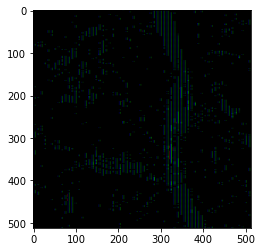

In [20]:
# 7. Display clusteredImage

img = Image.fromarray(clusteredImage.astype(int), 'RGB')
imgplot = plt.imshow(img)
plt.show()


In [21]:
imageinput[265,190,:].reshape(4,1)

array([[11],
       [12],
       [11],
       [11]], dtype=uint8)

In [22]:
initCentroids[2]

array([14., 14., 14., 14.])

In [23]:
im1[265,190]

13